# Machine Learning for Computer Vision
## Assignment 1 - Group 06



# 1.1 Part 1: Binary classification and the perceptron

## 1.1.1 The MNIST data set

In [1]:
from packages import *

import data_manager
import perceptron

### Read Data

In [2]:
### Read data
x_train, y_train, x_test, y_test = data_manager.read_mnist_data()

### In case the images should be saved to jpg files
# save_images_to_jpgs('./images/train2', x_train, y_train)
# save_images_to_jpgs('./images/test2', x_test, y_test)

### Reshape images and make them binary

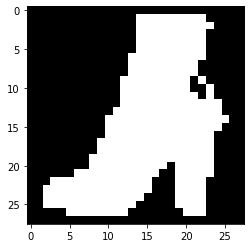

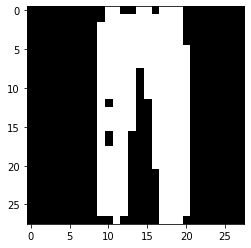

In [3]:
### Extracting subset of classes Ankle boot(9) and Trousers(1)
indices = np.where((y_train == 1) | (y_train == 9))
mnist_subset_rows = x_train[indices]
image_subset = np.copy(mnist_subset_rows.reshape(mnist_subset_rows.shape[0],28,28))
label_subset = y_train[indices]

### Convert images to binary
thres = 127
image_subset[image_subset < thres] = 0
image_subset[image_subset >= thres] = 1

plt.imshow(image_subset[1],  cmap='gray')
plt.show()
plt.imshow(image_subset[3],  cmap='gray')
plt.show()

### Extract features from the data

In [4]:
### Choose a smaller subset for testing purposes
image_subsubset = image_subset[20:70]
label_subsubset = label_subset[20:70]

### Extract features
features_subset = data_manager.extract_features(image_subsubset, label_subsubset)

### Normalize features
features_subset = data_manager.normalize_features(features_subset)

features_subset

,class,cx,cy,area,convex_area,eccentricity,perimeter,extent
image,,,,,,,,
0,Trousers,0.311909,0.348301,0.407186,0.126506,0.126506,0.126506,0.678571
1,Trousers,0.149720,0.414511,0.661677,0.397590,0.397590,0.397590,0.701531
2,Trousers,0.240390,0.335105,0.410180,0.099398,0.099398,0.099398,0.620130
3,Trousers,0.311633,0.304249,0.341317,0.069277,0.069277,0.069277,0.600000
4,Trousers,0.145775,0.408473,0.529940,0.292169,0.292169,0.292169,0.687500
5,Ankle boot,0.610612,0.910365,0.628743,0.343373,0.343373,0.343373,0.589286
6,Ankle boot,0.997045,0.907649,0.143713,0.063253,0.063253,0.063253,0.301775
7,Trousers,0.218293,0.000000,0.101796,0.036145,0.036145,0.036145,0.325926
8,Ankle boot,0.663447,0.816474,0.805389,0.608434,0.608434,0.608434,0.591575


### Plotting features

In [5]:
### Comparing different feature combinations
#sns.pairplot(features_subset, hue="class");

In [6]:
### Best combination with this subset seems to be 'perimeter' and the centroid 'cx'
#sns.scatterplot(data=features_subset, x='perimeter', y='cx', hue='class')
#sns.scatterplot(data=features_subset, x='perimeter', y='area', hue='class')

## 1.1.2 Perceptron training algorithm

### TODO - Batch version and whole sructure.
Chek if our online implementation is consistent with the one from the lecture.

9 epochs needed. w = [ 1.         -0.74096386 -0.88290343]
Prediction: [ 1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.]


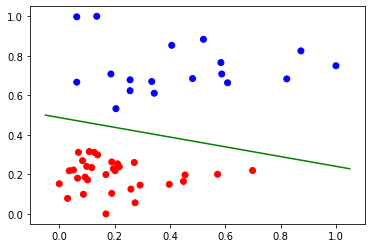

In [7]:
# X = np.vstack((features_subset.perimeter, features_subset.area))
X = np.vstack((features_subset.perimeter, features_subset.cx))

## Convert Ankle boot label from 9 to -1 for training
t = label_subsubset.astype(int)
t[t==int(9)] = -1
maxIts = 10
online = "test"
w = perceptron.percTrain(X, t, maxIts, online)
perceptron.plotDataAndDecitionBoundary(X,t,w)
prediction = perceptron.perc(w, X)


1) Is the data set $T$ linearly separable? <br>
Yes, the selected subset $T$ with the features 'perimeter' and 'cx' are linearly serparable. 
2) Is the perceptron training algorithm capable of detecting linearly non-separable data?  <br>
No, it is not. It uses all data points for computation, but cannot distinguish between corectly or falsely classified data. <br>
In such a case our perceptron implementation does not converge and reaches the defined max. iterations.

### Create feature transformation

In [8]:
X_mono = np.vstack((
    np.ones(X.shape[1]),
    X[0,:],
    X[1,:],
    X[0,:]**2,
    X[1,:]**2,
    X[0,:]*X[1,:]
    ))

print(X.shape)
print(X_mono.shape)

(2, 50)
(6, 50)


### Train monomial matrix with perceptron

2 epochs needed. w = [ 1.          1.         -0.98493976 -2.35924034 -0.68348998 -2.10281382
 -1.25978653]


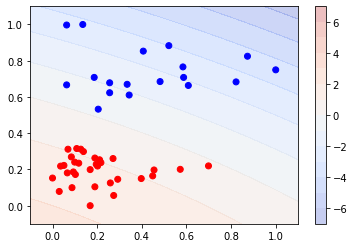

In [9]:
# size of grid
num = 200

x = np.linspace(-0.1, 1.1, num);
[x,y] = np.meshgrid(x,x);
x=x.reshape(1,-1)
y=y.reshape(1,-1)

w_mono = perceptron.percTrain(X_mono, t, maxIts, online)

x_grid = np.vstack((
    np.ones(x.shape[1]),
    x,
    y,
    x**2,
    y**2,
    x*y
))

#plt.scatter (x_test[1], x_test[2])

#prediction = perceptron.perc(w_mono, x_grid)
#print(prediction.shape)

x_grid_hom = np.vstack((np.ones(len(x_grid[0]),dtype=int), x_grid))
pre = w_mono @ x_grid_hom

preMin = min(pre)
preMax = max(pre)

levels = np.linspace(-7,7,15)
#levels = [-1,0,1] # to see SVM
cs = plt.contourf(x.reshape(num,num), y.reshape(num,num), pre.reshape(num,num), alpha=0.3, levels=levels, cmap=cm.coolwarm) 
plt.scatter (X_mono[1], X_mono[2], c= ['r' if c == 1 else 'b' for c in t])
cbar = plt.colorbar(cs)


### Train perceptron using all pixels of subset

2 epochs needed. w = [   0.    0.    0.    0.    0.   35.   45.   58.   98.   70.   70.   80.
  285.  279.  258.  255.  275.  242.  286.  224.   67.   53.   40.   60.
   75.    0.    0.    0.    0.    0.    0.    0.    0.   85.  109.   88.
   67.   77.   78.  148.  278.  309.  316.  290.  332.  313.  325.  389.
   77.   78.  109.  114.  120.    0.    0.    0.    0.    0.    0.    0.
    0.   83.   80.   70.   87.   93.   92.  287.  359.  356.  315.  310.
  316.  298.  329.  387.  226.  179.   62.   78.  109.   10.    0.    0.
    0.    0.    0.    0.    3.   70.   45.   57.   48.   63.   40.  271.
  355.  451.  458.  480.  409.  299.  309.  294.  104.   33.   21.   46.
   83.   28.    0.   -2.   -3.    0.    0.    0.   36.   87.   13.   11.
   28.   98.   46.  290.  276.  365.  473.  372.  411.  335.  316.   94.
  -38. -165.   87.   95.   98.   41.   -1.    1.    0.    0.    0.    0.
   52.   77.   55.   88.   82.   78.   92.  379.  304.  402.  404.  242.
  362.  370.  199.   76.    6.

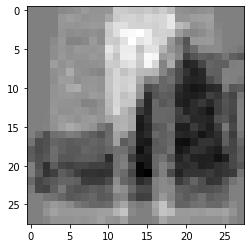

In [10]:
X_pixels = mnist_subset_rows[20:70]
# t stays the same
maxIts = 100
online = True

w_pixels = perceptron.percTrain(X_pixels.T, t, maxIts, online)
prediction_pixels = perceptron.perc(w_pixels, X_pixels.T)

weight_image = w_pixels[1:785].reshape(28,28)

plt.imshow(weight_image,  cmap='gray')
plt.show()

### Error rate

#### Prepare test data

Prediction: [-1.  1.  1. ... -1.  1.  1.]
Prediction: [-1.  1.  1. ... -1.  1.  1.]
Prediction: [-1.  1.  1. ... -1.  1.  1.]


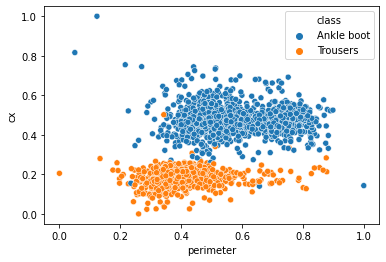

In [11]:
indices_test = np.where((y_test == 1) | (y_test == 9))
mnist_subset_rows_test = x_test[indices_test]
image_subset_test = np.copy(mnist_subset_rows_test.reshape(mnist_subset_rows_test.shape[0],28,28))
label_subset_test = y_test[indices_test]

thres = 127
image_subset_test[image_subset_test < thres] = 0
image_subset_test[image_subset_test >= thres] = 1

features_subset_test = data_manager.extract_features(image_subset_test, label_subset_test)
features_subset_test = data_manager.normalize_features(features_subset_test)

sns.scatterplot(data=features_subset_test, x='perimeter', y='cx', hue='class')

### Determine predictions with the computed weight vectors from above

## 2 feature prediction
X_test = np.vstack((features_subset_test.perimeter, features_subset_test.cx))
pre_test = perceptron.perc(w, X_test)

## Monomial prediction
X_mono_test = np.vstack((
    np.ones(X_test.shape[1]),
    X_test[0,:],
    X_test[1,:],
    X_test[0,:]**2,
    X_test[1,:]**2,
    X_test[0,:]*X_test[1,:]
))
pre_mono_test = perceptron.perc(w_mono, X_mono_test)

## All pixels
X_pixels_test = mnist_subset_rows_test
pre_pixels_test = perceptron.perc(w_pixels, X_pixels_test.T)



#### Method for computing error rate

In [12]:
def compute_error_rate(prediction, target, dataset):
    accuracy = (prediction == target).mean()
    error_rate = 1 - accuracy
    print(dataset,error_rate*100,'%')

#### Show error rates

In [13]:
accuracy = (prediction_pixels == t).mean()

# pre_test ; pre_mono_test ; pre_pixels_test
t_test = label_subset_test.astype(int)
t_test[t_test==int(9)] = -1
maxIts = 100
online = True

# 2 features
compute_error_rate(pre_test, t_test, 'Features: ')
# Monomials
compute_error_rate(pre_mono_test, t_test, 'Monomials: ')
# All pixels
compute_error_rate(pre_pixels_test , t_test, 'Pixels: ')

Features:  2.749999999999997 %
Monomials:  3.1000000000000028 %
Pixels:  1.200000000000001 %
